## MEDIUM 002 - Future Values and Ipywidgets

In [1]:
# Importing the libraries
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import HBox, VBox

In [2]:

!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
def fv_cum(value, r, t):
    future_value = value*(1+r)**t
       
    return round(future_value, 2)

In [4]:
fv_cum(100, .06, 30)

574.35

### Future Value

The numpy financial module  contains a function <b>future value</b>, .fv(rate, nper, pmt, pv), which allows you to calculate the future value of an investment as before with a few simple parameters:

* rate: The rate of return of the investment
* nper: The lifespan of the investment
* pmt: The (fixed) payment at the beginning or end of each period (which is 0 in our example)
* pv: The present value of the investment

It is important to note that in this function call, you must pass a negative value into the pv parameter if it represents a negative cash flow (cash going out). In other words, if you were to compute the future value of an investment, requiring an up-front cash payment, you would need to pass a negative value to the pv parameter in the .fv() function.

- Instructions :

1. Using Numpy's .fv() function, calculate the future value of a $100 investment returning 7% per year for 2 years 


In [5]:
# Calculate investment
investment = npf.fv(rate=.05, nper=2, pmt=0, pv=-100)
print("$" + str(round(investment, 2)))


$110.25


### Different interest rates

Text(0.5, 0, 'years')

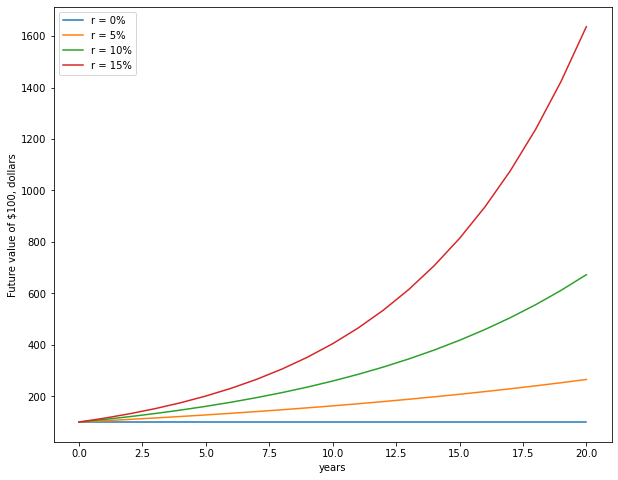

In [9]:
plt.figure(figsize=(10,8))

y = [npf.fv(rate=np.linspace(0.0,0.15,num=4), nper=i, pmt=0.0, pv=-100) for i in range(21)]

plt.plot(y)

plt.legend(["r = 0%", "r = 5%","r = 10%" , "r = 15%"])

plt.ylabel('Future value of $100, dollars')
plt.xlabel('years')

### Using Ipywidgets

In [8]:
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline


def show_fv(rate):
    plt.figure(figsize=(10,8))
    y = [npf.fv(rate, nper=i, pmt=0, pv=-100) for i in range(21)]

    plt.plot(y)

    plt.ylabel('Future value of $100, dollars')
    plt.xlabel('years')
    
controls = widgets.interactive(show_fv,rate=(0, .20, .01))

display(controls)


interactive(children=(FloatSlider(value=0.1, description='rate', max=0.2, step=0.01), Output()), _dom_classes=…

### Adjusting Future Values for Inflation

You can now put together what you learned in the previous exercises by following a simple methodology:

First, forecast the future value of an investment given a rate of return
Second, discount the future value of the investment by a projected inflation rate
The methodology above will use both the .fv() and .pv() functions to arrive at the projected value of a given investment in today's dollars, adjusted for inflation.

- Instructions:

1. Calculate the future value of a $10,000 investment returning 8% per year for 10 years using .fv() and assign it to investment_1.

2. Calculate the inflation-adjusted present value of investment_1, using an inflation rate of 3% per year and assign it to investment_1_discounted.

In [ ]:
# Calculate investment_1
investment_1 = npf.fv(rate=0.08, nper=10, pmt=0, pv=-10000)
print("Investment 1 will yield a total of $" + str(round(investment_1, 2)) + " in 10 years")

# Calculate investment_2
investment_1_discounted = npf.pv(rate=0.03, nper=10, pmt=0, fv=investment_1)
print("After adjusting for inflation, investment 1 is worth $" + str(round(-investment_1_discounted, 2)) + " in today's dollars")

### Discounting Cash Flows

You can use numpy's net present value function numpy.npv(rate, values) to calculate the net present value of a series of cash flows. You can create these cash flows by using a numpy.array([...]) of values.



In [ ]:

# Predefined array of cash flows
cash_flows = np.array([100, 100, 100, 100, 100])

# Calculate investment_1
investment_1 = npf.npv(rate=.03, values=cash_flows)
print("Investment 1's net present value is $" + str(round(investment_1, 2)) + " in today's dollars")

# Calculate investment_2
investment_2 = npf.npv(rate=.05, values=cash_flows)
print("Investment 2's net present value is $" + str(round(investment_2, 2)) + " in today's dollars")


### Initial Project Costs

The numpy.npv(rate, values) function is very powerful because it allows you to pass in both positive and negative values.

- Instructions:
1. Create a numpy array of the cash flow values for project 1, assigning it to cash_flows_1, and then do the same for project 2, assigning the values to cash_flows_2.

2. Calculate the net present value of both projects 1 and 2 assuming a 3% inflation rate.


In [ ]:
# Create an array of cash flows for project 1
cash_flows_1 = np.array([-250, 100, 200, 300, 400])

# Create an array of cash flows for project 2
cash_flows_2 = np.array([-250, 300, -250, 300, 300])


# Calculate the net present value of project 1
investment_1 = npf.npv(rate=0.03, values=cash_flows_1)

print("The net present value of Investment 1 is worth $" + str(round(investment_1, 2)) + " in today's dollars")

# Calculate the net present value of project 2
investment_2 = npf.npv(rate=0.03, values=cash_flows_2)
print("The net present value of Investment 2 is worth $" + str(round(investment_2, 2)) + " in today's dollars")

### Diminishing Cash Flows

Remember how compounded returns grow rapidly over time? Well, it works in the reverse, too. Compounded discount factors over time will quickly shrink a number towards zero.


In [ ]:
# Calculate investment_1
investment_1 = npf.pv(rate=.03, nper=30, pmt=0, fv=100)
print("Investment 1 is worth $" + str(round(-investment_1, 2)) + " in today's dollars")

# Calculate investment_2
investment_2 = npf.pv(rate=.03, nper=50, pmt=0, fv=100)
print("Investment 2 is worth $" + str(round(-investment_2, 2)) + " in today's dollars")
